In [73]:
import numpy as np


def adjust_lr(last_epoch,T_mul = 2,T_0=150,T_mult=1.5,eta_min=0.001,eta_max=0.1):
        step_num = last_epoch
        if T_mul == 2:
            i = np.log2(step_num / T_0 + 1).astype(np.int32)
            T_cur = step_num - T_0 * (T_mult ** (i) - 1)
            T_i = (T_0 * T_mult ** i)
        elif T_mul == 1:
            T_cur = step_num % T_0
            T_i = T_0
        cur_lr = eta_min + 0.5 * (eta_max - eta_min) * (1 + np.cos(np.pi * T_cur / T_i))
        return cur_lr

def adjust_lrss(last_epoch,T_0=1500,T_mult=0.99999,eta_min=0.001):
    step_num = last_epoch + 1

    cur_lr = eta_min* T_mult ** step_num+np.cos(np.pi * step_num / T_0 )*0.00005
    return cur_lr


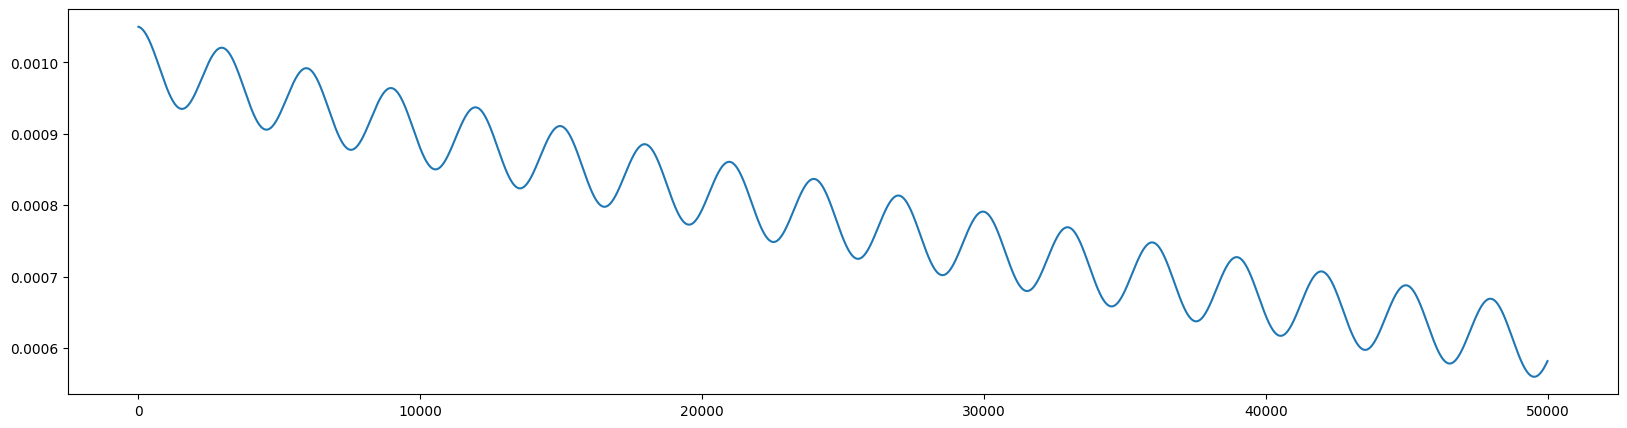

In [74]:
import random
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import axes
csc=[]
sss=[]
fff=plt.figure(figsize=(20,5))
for i in range(50000):
    csc.append(i)
    sss.append(adjust_lrss(i))

plt.plot(csc,sss)
plt.show()


